In [1]:
import boto3

In [2]:
s3_client = boto3.client('s3')

In [4]:
s3_client.upload_file(Bucket="yelp-dataset-pt-9", Filename='../../../en.csv', Key="spencer/data/sentiment/en/en.csv")

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("s3://yelp-dataset-pt-9/spencer/data/sentiment/en/en.csv")

In [3]:
df.shape

(7967838, 2)

In [4]:
from sklearn.model_selection import train_test_split

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 12] Cannot allocate memory.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [5]:
train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['stars'])

In [6]:
train.shape, test.shape

((6374270, 2), (1593568, 2))

In [7]:
train.to_csv("s3://yelp-dataset-pt-9/spencer/data/sentiment/en/train.csv", index=False)
test.to_csv("s3://yelp-dataset-pt-9/spencer/data/sentiment/en/val.csv", index=False)

In [8]:
sample = train.sample(1_000_000, random_state=42)

In [9]:
train, test = train_test_split(sample, test_size=.2, random_state=42, stratify=sample['stars'])

In [10]:
train.to_csv("s3://yelp-dataset-pt-9/spencer/data/sentiment/en/train_small.csv", index=False)
test.to_csv("s3://yelp-dataset-pt-9/spencer/data/sentiment/en/test_small.csv", index=False)

In [11]:
min_stars = train.groupby('stars')['stars'].count().min()
even_dist = train.groupby("stars").apply(pd.DataFrame.sample, min_stars)
even_dist = even_dist.reset_index(drop=True)
even_dist['stars'].plot.hist();

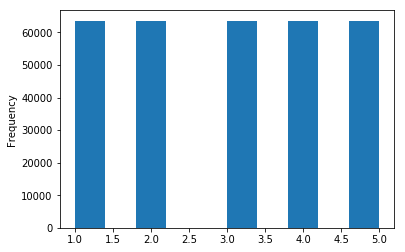

In [12]:
even_dist['stars'].plot.hist();

In [13]:
even_dist.shape

(318045, 2)

In [14]:
even_dist.head()

,text,stars
0,Bad spray tan and rude customer service! I wen...,1.0
1,First visit after moving into the neighborhood...,1.0
2,Buyer beware!!! If you buy a car from this pla...,1.0
3,This place was horrible! I went in for a mani...,1.0
4,Terrible service for mediocre food. I went to ...,1.0


In [15]:
from sklearn.utils import shuffle
even_dist = shuffle(even_dist)

In [16]:
even_dist.head()

,text,stars
124559,I wast here to attend the Tuesday Blend event....,2.0
30600,If I could give a zero I would. Have not staye...,1.0
77160,I really want to like this place.\n\nI have go...,2.0
181964,I came here once to see a world cup game on th...,3.0
39235,Horrible service. Did not even try it. I went ...,1.0


In [17]:
even_dist.to_csv("s3://yelp-dataset-pt-9/spencer/data/sentiment/en/train_bal.csv", index=False)

In [20]:
sample = train.sample(318045, random_state=42)

In [21]:
sample.to_csv("s3://yelp-dataset-pt-9/spencer/data/sentiment/en/train_same_size_as_bal.csv", index=False)

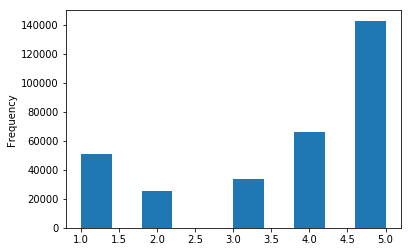

In [22]:
sample['stars'].plot.hist();